In [ ]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import torch.nn as nn
import pylab
import torch

In [ ]:
!git clone https://github.com/facebookresearch/detr.git
!cp -r ./detr/* ./

Cloning into 'detr'...
remote: Enumerating objects: 260, done.
remote: Total 260 (delta 0), reused 0 (delta 0), pack-reused 260
Receiving objects: 100% (260/260), 12.85 MiB | 22.96 MiB/s, done.
Resolving deltas: 100% (142/142), done.


In [ ]:
model = torch.hub.load('facebookresearch/detr','detr_resnet50', pretrained=True)
checkpoint = torch.hub.load_state_dict_from_url(url='https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth', map_location='cpu',check_hash=True)
model.load_state_dict(checkpoint['model'], strict=False)
model.class_embed = nn.Linear(in_features=model.class_embed.in_features, out_features=5)
torch.save({'model' : model.state_dict()}, 'detr_model_pretrained.pth')

Using cache found in /root/.cache/torch/hub/facebookresearch_detr_main


In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
!python main.py \
  --coco_path "/content/drive/MyDrive/custom/" \
  --output_dir "outputs" \
  --resume "detr_model_pretrained.pth" \
  --epochs 40 \
  --lr 1e-5

Not using distributed mode
fatal: not a git repository (or any of the parent directories): .git
git:
  sha: N/A, status: clean, branch: N/A

Namespace(aux_loss=True, backbone='resnet50', batch_size=2, bbox_loss_coef=5, clip_max_norm=0.1, coco_panoptic_path=None, coco_path='/content/drive/MyDrive/custom/', dataset_file='coco', dec_layers=6, device='cuda', dice_loss_coef=1, dilation=False, dim_feedforward=2048, dist_url='env://', distributed=False, dropout=0.1, enc_layers=6, eos_coef=0.1, epochs=40, eval=False, frozen_weights=None, giou_loss_coef=2, hidden_dim=256, lr=1e-05, lr_backbone=1e-05, lr_drop=200, mask_loss_coef=1, masks=False, nheads=8, num_queries=100, num_workers=2, output_dir='outputs', position_embedding='sine', pre_norm=False, remove_difficult=False, resume='detr-r50.pth', seed=42, set_cost_bbox=5, set_cost_class=1, set_cost_giou=2, start_epoch=0, weight_decay=0.0001, world_size=1)
number of params: 41302368
loading annotations into memory...
Done (t=0.01s)
creating index.

In [ ]:
from util.plot_utils import plot_logs
from pathlib import Path

log_directory = [Path('outputs/')]

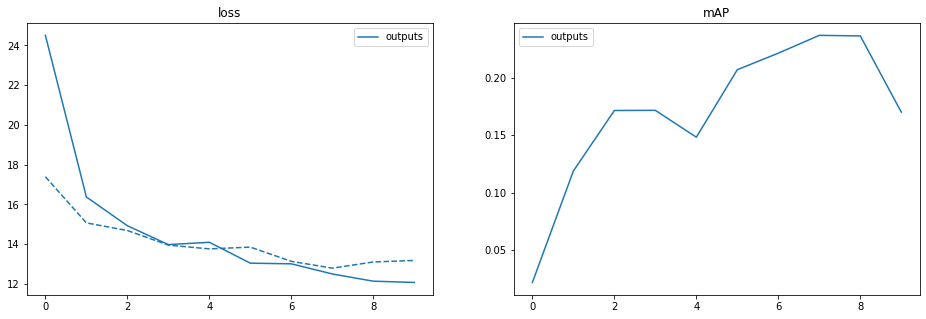

In [ ]:
fields_of_interest = ('loss','mAP')

plot_logs(log_directory,
          fields_of_interest)